In [1]:
import opendatasets as od
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import os
import pandas as pd

In [2]:
dataset= "https://www.kaggle.com/uciml/student-alcohol-consumption"

In [3]:
od.download(dataset)

Skipping, found downloaded files in ".\student-alcohol-consumption" (use force=True to force download)


In [4]:
data_dir= ".\student-alcohol-consumption"

In [5]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'student-merge.R']

In [6]:
# _m means math course
student_m= pd.read_csv('student-mat.csv')
# _p means portugese course
student_p= pd.read_csv('student-por.csv')

In [7]:
student_m.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:


G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets .

These students can be identified by searching for identical attributes

that characterize each student, as shown in the annexed R file.

In [8]:
data= pd.concat([student_m , student_p])

In [9]:
data.shape

(1044, 33)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [11]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


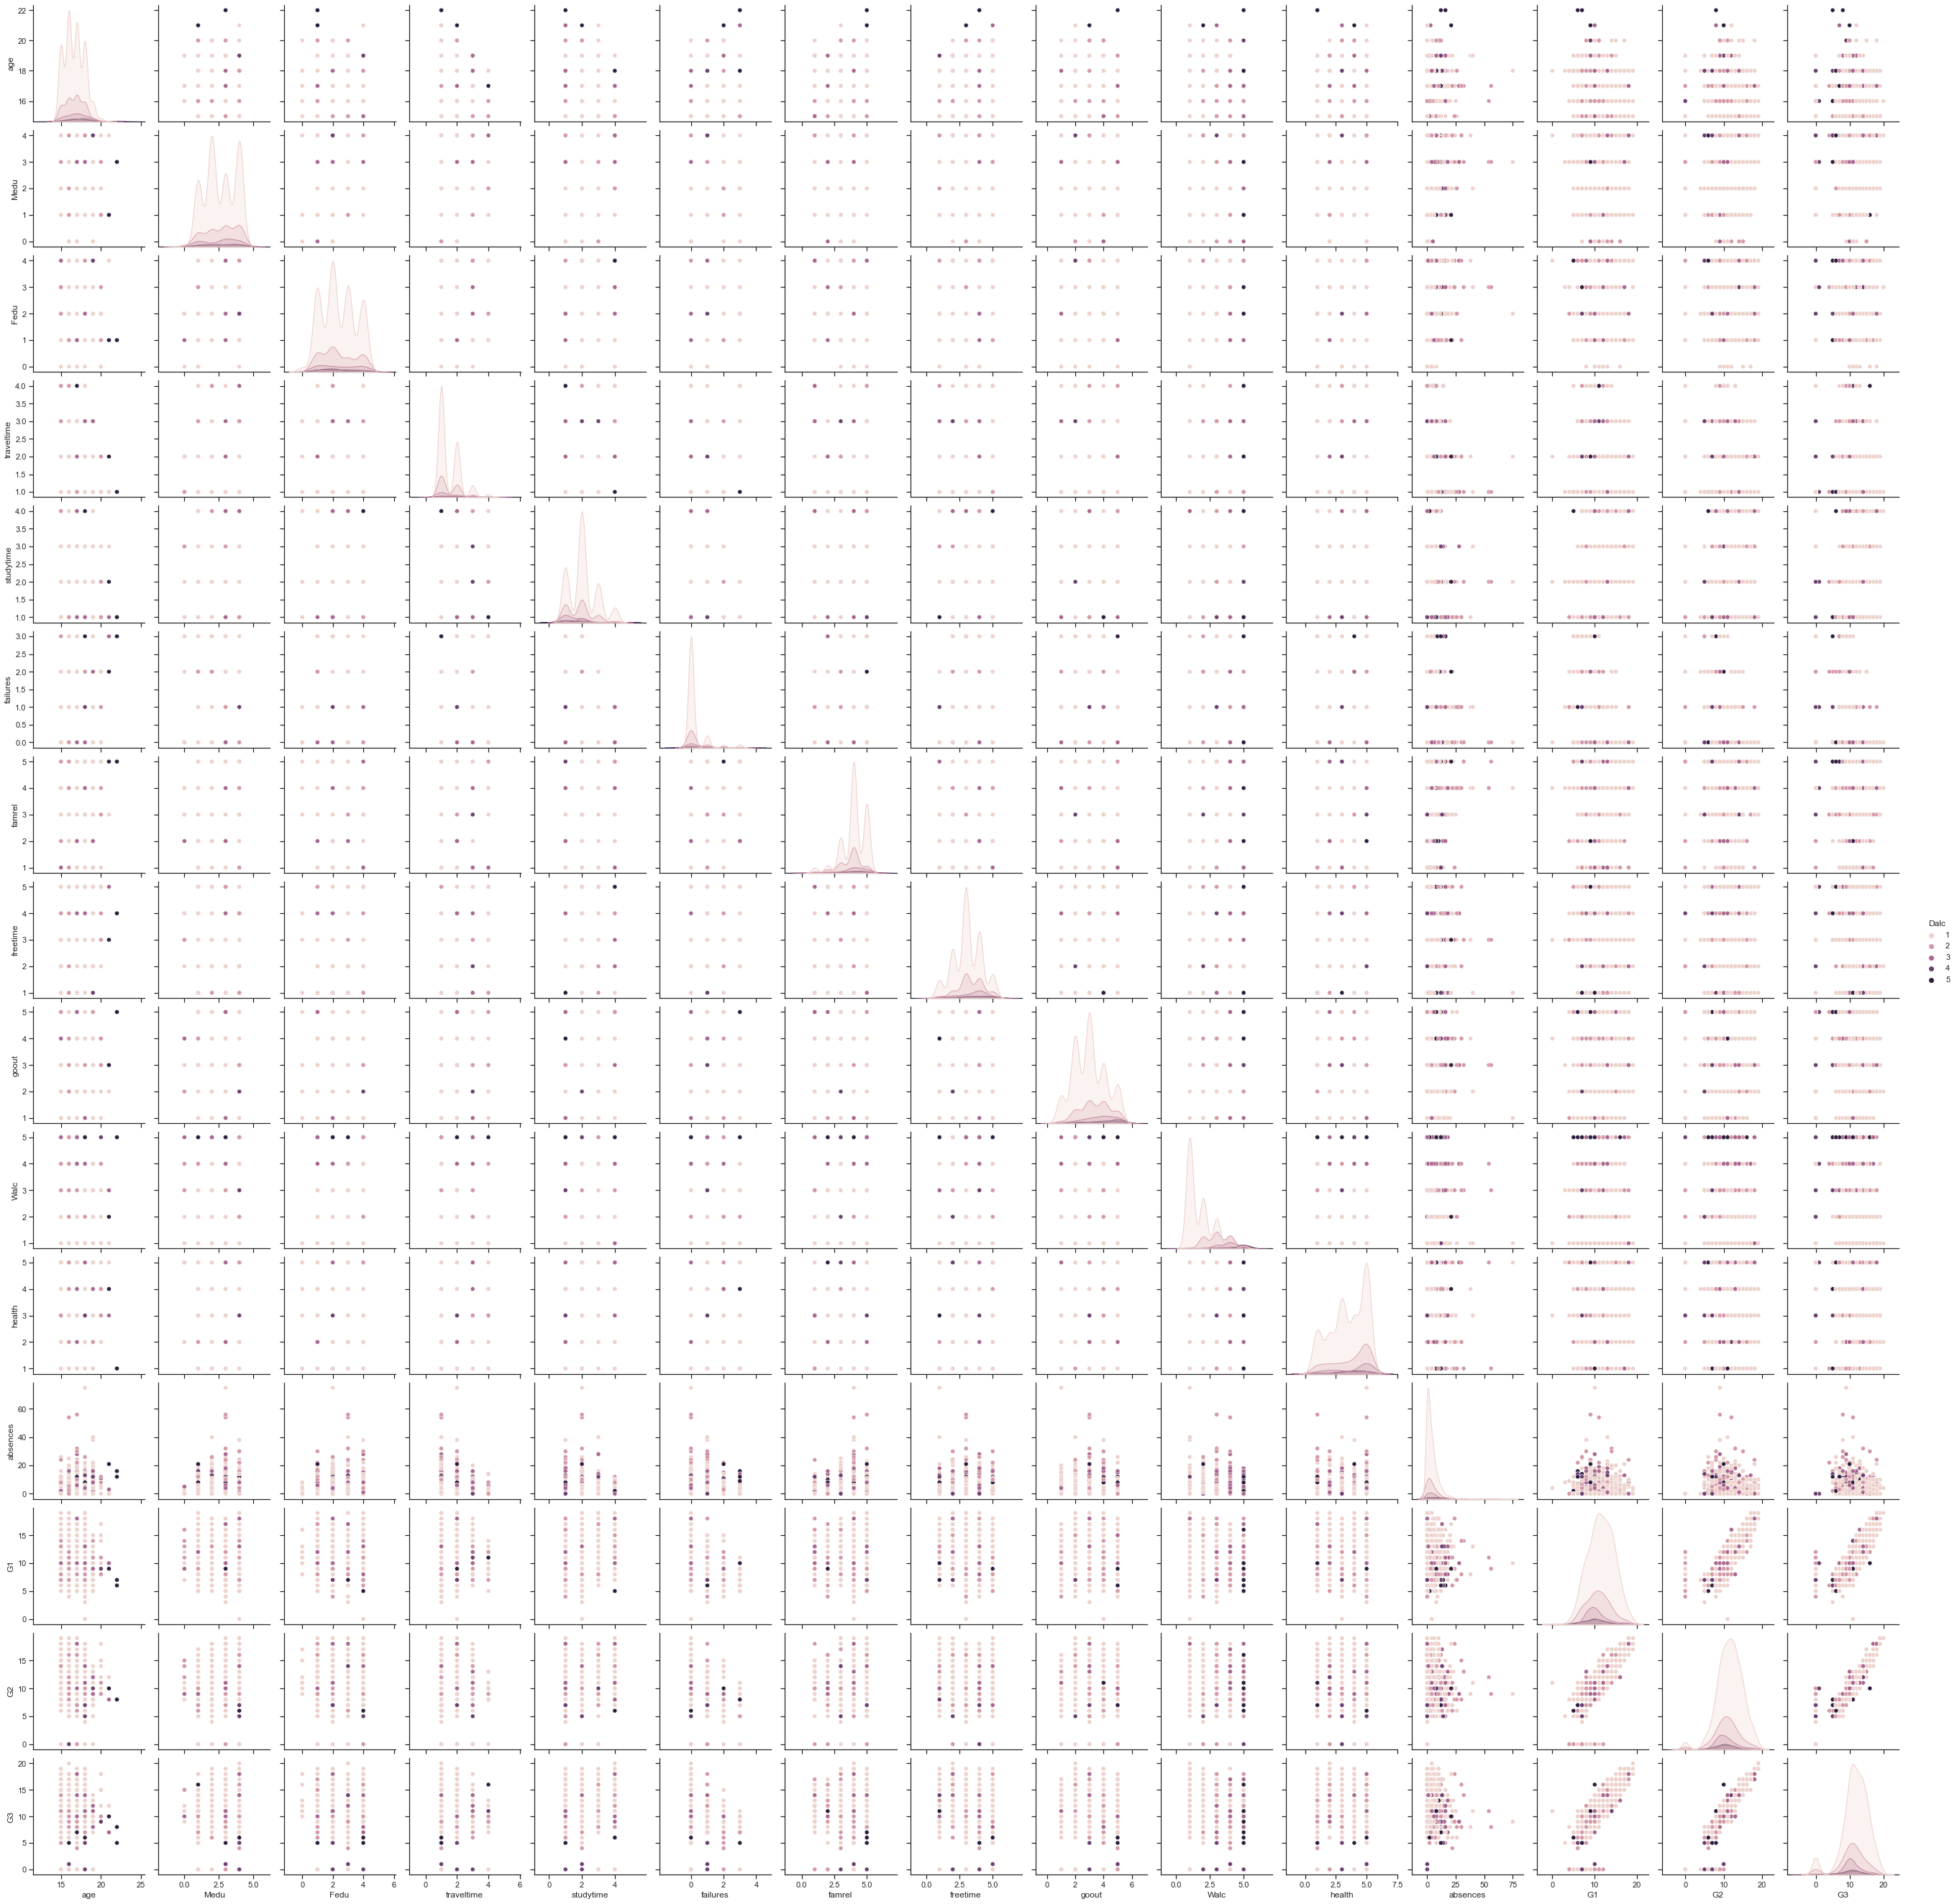

In [12]:
sns.set_theme(style="ticks")
sns.pairplot(data,
            hue= "Dalc")

In [13]:
data[["paid"]].value_counts()

paid
no      824
yes     220
dtype: int64

In [14]:
data["school"].value_counts()

GP    772
MS    272
Name: school, dtype: int64

<AxesSubplot:xlabel='school', ylabel='count'>

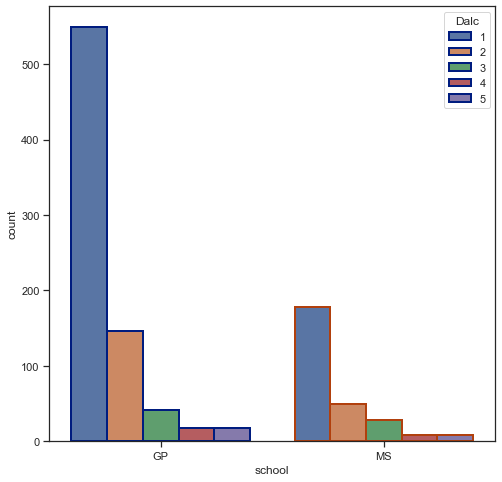

In [158]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "school", hue= "Dalc",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='age', ylabel='count'>

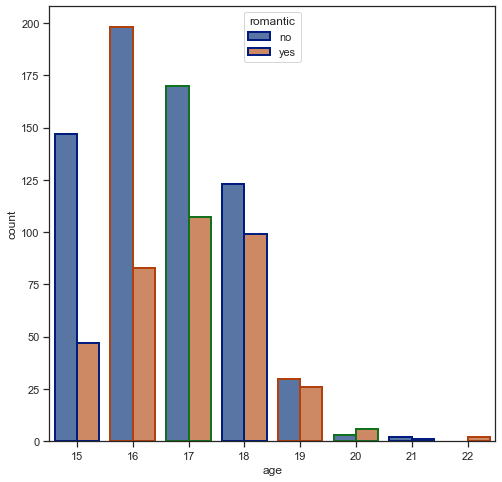

In [157]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "age", hue= "romantic",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='studytime', ylabel='count'>

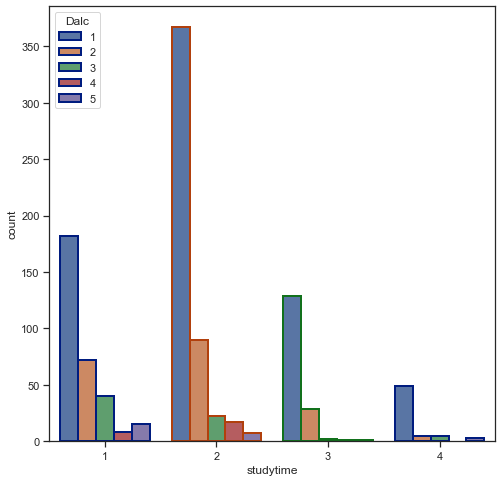

In [156]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "studytime", hue= "Dalc",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='failures', ylabel='count'>

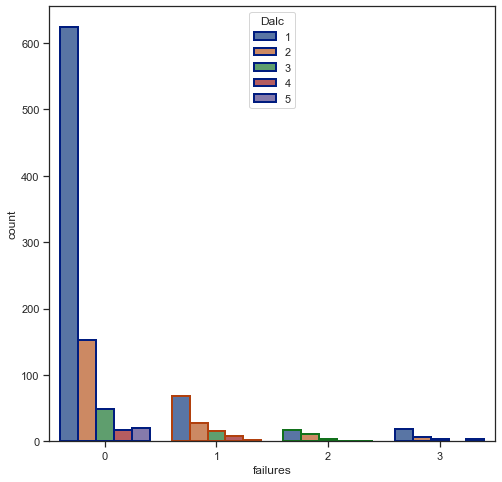

In [155]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "failures", hue= "Dalc",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='Dalc', ylabel='count'>

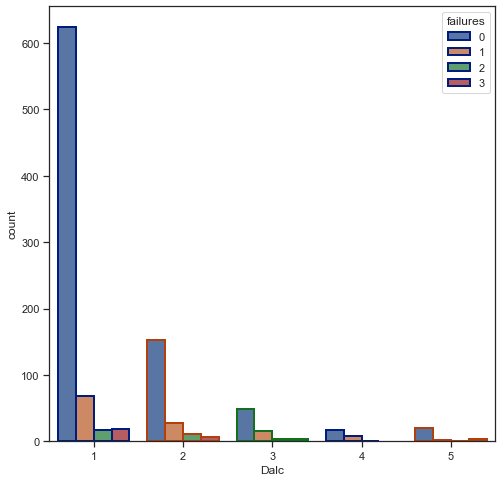

In [154]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "Dalc", hue= "failures",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='Walc', ylabel='count'>

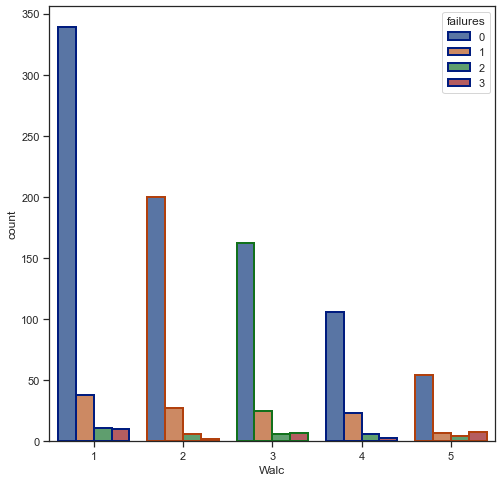

In [153]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "Walc", hue= "failures",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='health', ylabel='count'>

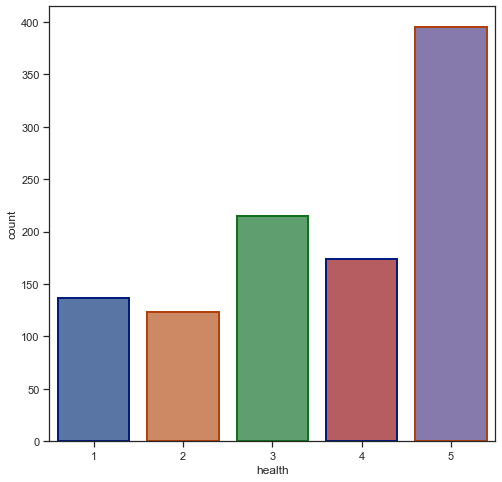

In [152]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "health",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='health', ylabel='count'>

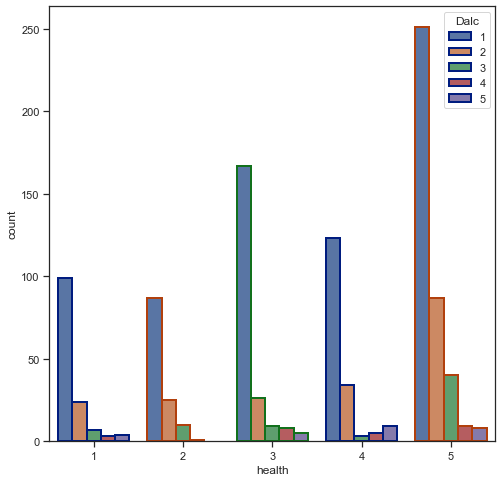

In [151]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "health", hue= "Dalc",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='absences', ylabel='count'>

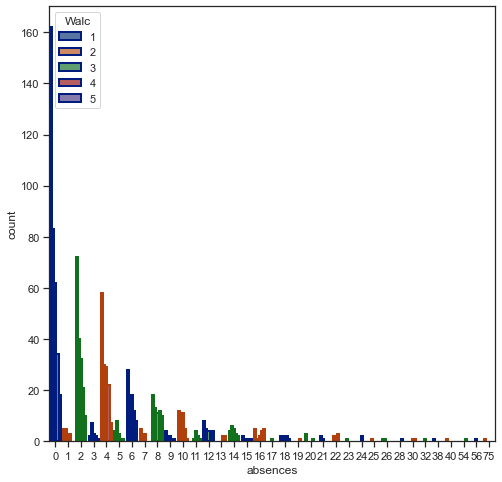

In [150]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "absences", hue= "Walc",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

In [48]:
list(data["Medu"].value_counts())

[306, 289, 238, 202, 9]

In [49]:
list(data["Medu"].value_counts().keys())

[4, 2, 3, 1, 0]

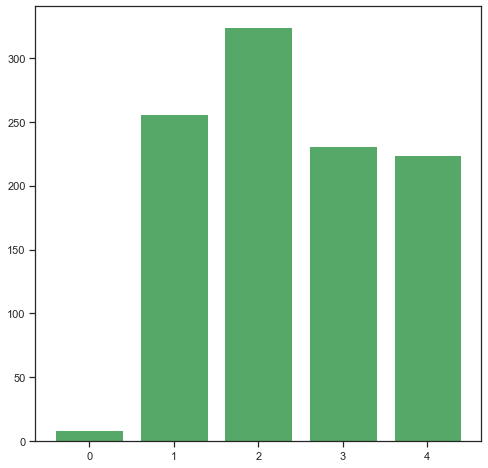

In [56]:
plt.figure(figsize= (8,8))
plt.bar(list(data["Fedu"].value_counts().keys()),list(data["Fedu"].value_counts()),color="g")
plt.show()

In [50]:
list(data["Fedu"].value_counts())

[324, 256, 231, 224, 9]

In [51]:
list(data["Fedu"].value_counts().keys())

[2, 1, 3, 4, 0]

In [31]:
list(data["Mjob"].value_counts())

[399, 239, 194, 130, 82]

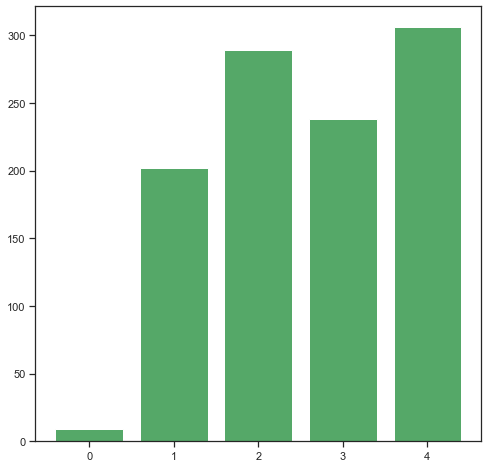

In [53]:
plt.figure(figsize= (8,8))
plt.bar(list(data["Medu"].value_counts().keys()),list(data["Medu"].value_counts()),color="g")
plt.show()

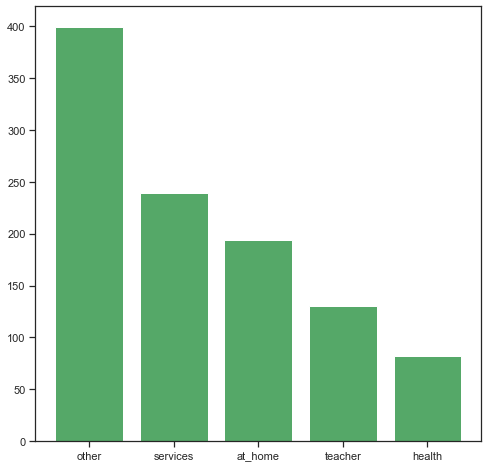

In [54]:
plt.figure(figsize= (8,8))
plt.bar(list(data["Mjob"].value_counts().keys()),list(data["Mjob"].value_counts()),color="g")
plt.show()

In [32]:
list(data["Mjob"].value_counts().keys())

['other', 'services', 'at_home', 'teacher', 'health']

In [39]:
list(data["Fjob"].value_counts())

[584, 292, 65, 62, 41]

In [40]:
list(data["Fjob"].value_counts().keys())

['other', 'services', 'teacher', 'at_home', 'health']

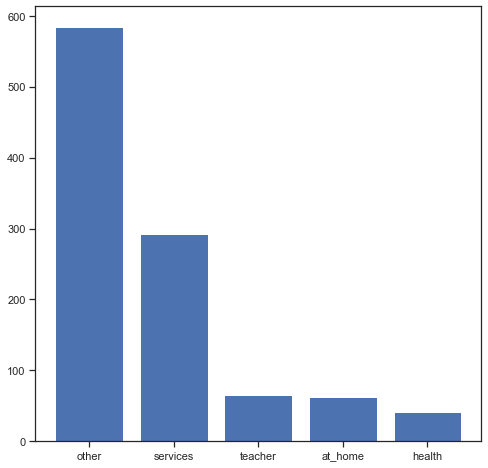

In [47]:
plt.figure(figsize= (8,8))
plt.bar(list(data["Fjob"].value_counts().keys()),list(data["Fjob"].value_counts()),color="b")
plt.show()

In [42]:
Fjob= ['other', 'services', 'teacher', 'at_home', 'health']
Mjob= ['other', 'services', 'at_home', 'teacher', 'health']
fig= go.Figure(data= [
    go.Bar(name= "Father's Job", x= Fjob, y= [584, 292, 65, 62, 41]),
    go.Bar(name= "Mother's Job", x= Mjob, y= [309, 239, 194, 130, 82])
])
# Change the bar mode
fig.update_layout(barmode='group', title= "Distribution of Mothers and Father's Work")
fig.show()

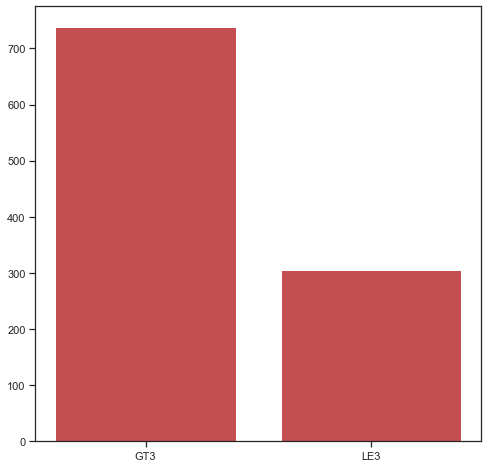

In [59]:
plt.figure(figsize= (8,8))
plt.bar(list(data["famsize"].value_counts().keys()),list(data["famsize"].value_counts()),color="r")
plt.show()

<AxesSubplot:xlabel='health', ylabel='count'>

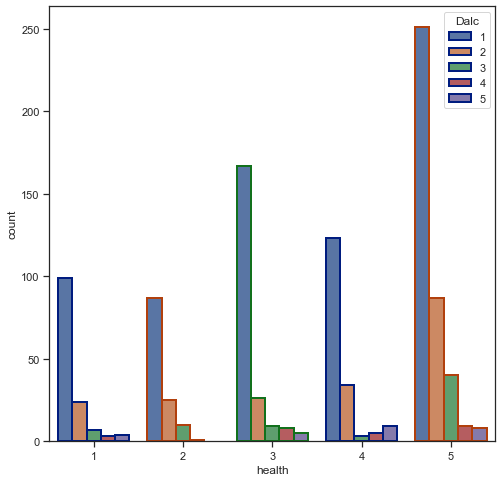

In [149]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "health", hue= "Dalc",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='health', ylabel='count'>

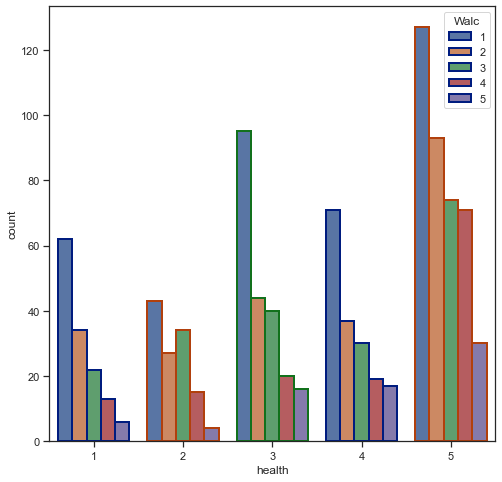

In [148]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "health", hue= "Walc",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='famrel', ylabel='count'>

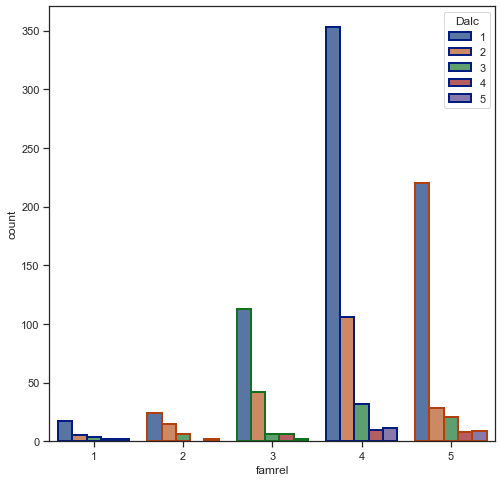

In [147]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "famrel", hue= "Dalc",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='famsize', ylabel='count'>

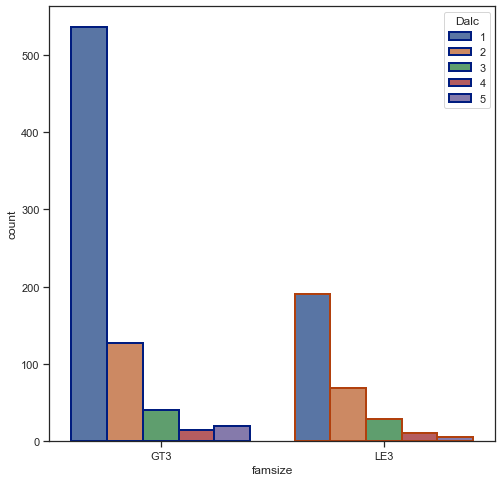

In [146]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "famsize", hue= "Dalc",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='famsize', ylabel='count'>

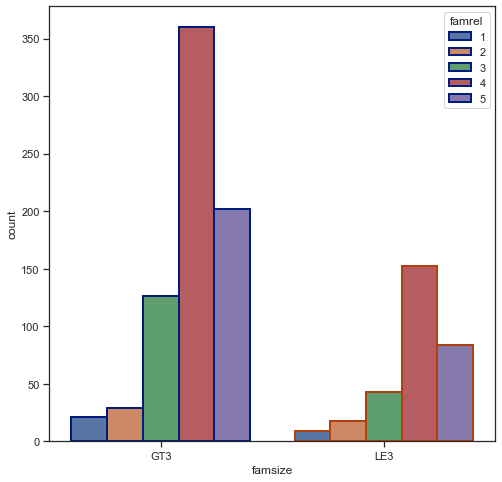

In [145]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "famsize", hue= "famrel",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='goout', ylabel='count'>

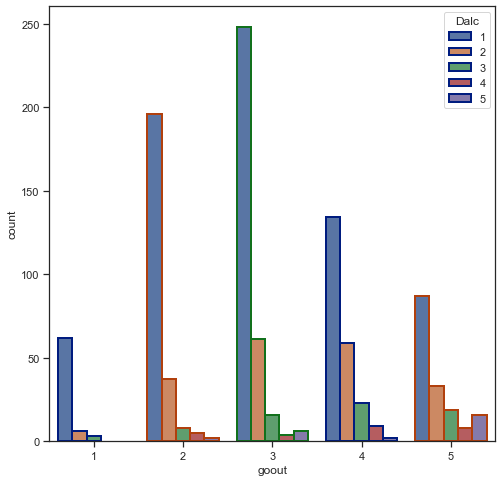

In [144]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "goout", hue= "Dalc",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='freetime', ylabel='count'>

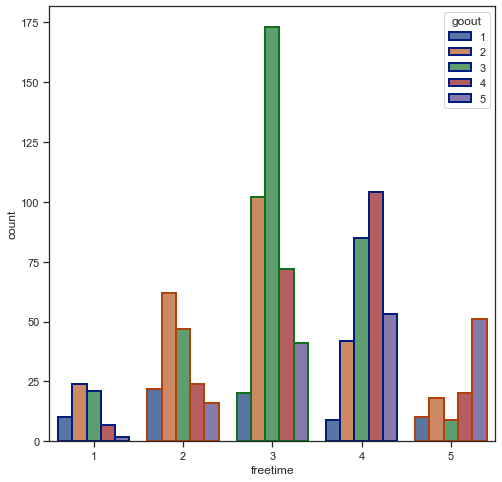

In [143]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "freetime", hue= "goout",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='traveltime', ylabel='count'>

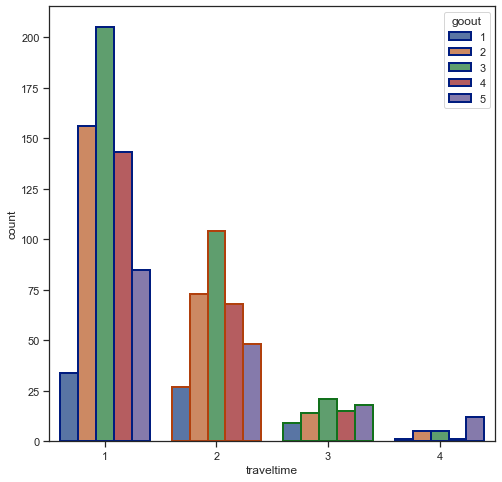

In [142]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "traveltime", hue= "goout",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='traveltime', ylabel='count'>

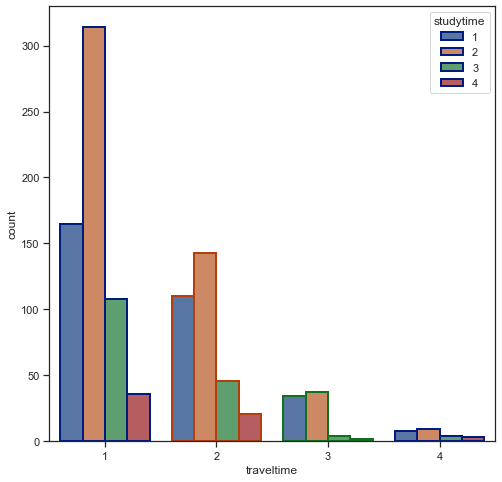

In [139]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "traveltime", hue= "studytime",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='paid', ylabel='count'>

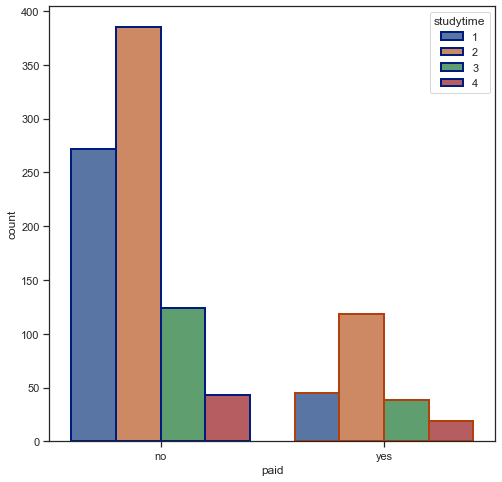

In [138]:
plt.figure(figsize= (8,8))
sns.countplot(data= data, x= "paid", hue= "studytime",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

In [75]:
df= data[data["studytime"]==4]

In [76]:
list(df["Dalc"].value_counts())

[49, 5, 5, 3]

In [77]:
list(df["Dalc"].value_counts().keys())

[1, 2, 3, 5]

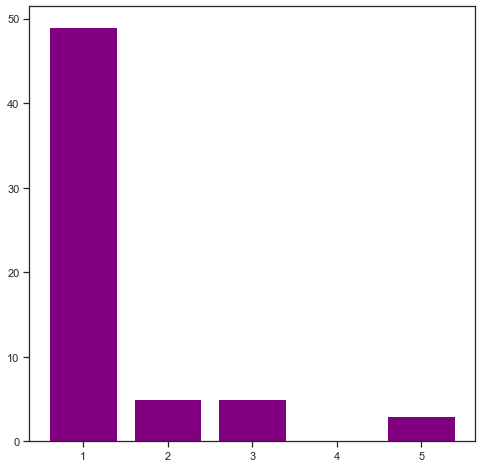

In [78]:
plt.figure(figsize= (8,8))
plt.bar(list(df["Dalc"].value_counts().keys()),list(df["Dalc"].value_counts()),color="purple")
plt.show()

<AxesSubplot:xlabel='famrel', ylabel='count'>

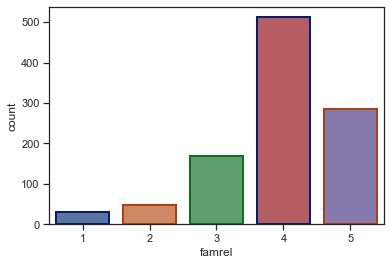

In [82]:
sns.countplot(data= data, x= "famrel",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='goout', ylabel='count'>

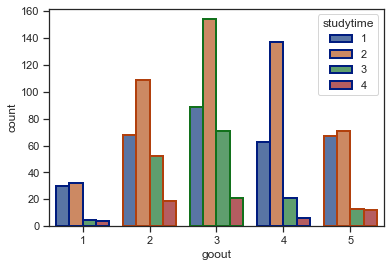

In [83]:
sns.countplot(data= data, x= "goout", hue= "studytime",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='Dalc', ylabel='count'>

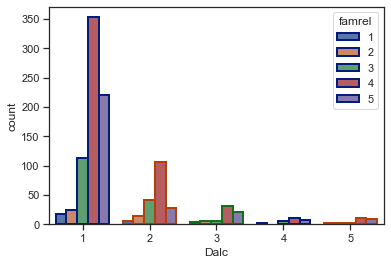

In [134]:
sns.countplot(data= data, x= "Dalc", hue= "famrel",
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

In [53]:
df["Mjob"].value_counts()

other       27
services    16
at_home      8
teacher      7
health       4
Name: Mjob, dtype: int64

In [54]:
df[df["Mjob"]== "at_home"].sort_values(by= ["famrel"])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
434,MS,F,16,U,LE3,A,2,2,at_home,other,...,1,2,1,1,1,1,4,10,9,11
95,GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,2,7,10,10
95,GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,4,13,13,13
334,GP,F,18,R,GT3,T,2,2,at_home,other,...,4,4,4,1,1,4,0,10,9,0
390,GP,F,18,R,GT3,T,2,2,at_home,other,...,4,4,4,1,1,4,6,14,13,14
282,GP,F,18,R,LE3,T,1,1,at_home,other,...,5,2,2,1,1,3,1,12,12,12
327,GP,F,18,R,LE3,T,1,1,at_home,other,...,5,2,2,1,1,3,2,17,17,18
523,MS,M,18,U,LE3,T,4,4,at_home,health,...,5,5,5,5,5,5,2,5,6,6


<AxesSubplot:xlabel='famrel', ylabel='count'>

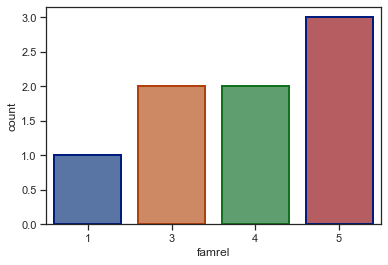

In [135]:
sns.countplot(data= data, x= df[df["Mjob"]== "at_home"]["famrel"],
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

In [56]:
fig= px.histogram(df,
            x= df[df["Fjob"]== "services"]["famrel"],
            title= "Students who failed",
                 barmode= "group")
fig.update_layout(bargap=0.1)
fig.show()

<AxesSubplot:xlabel='famrel', ylabel='count'>

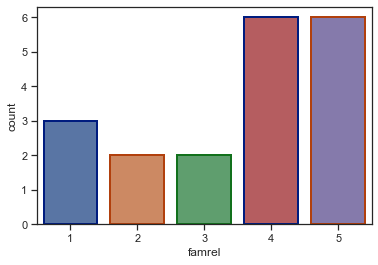

In [137]:
sns.countplot(data= data, x= df[df["Fjob"]== "services"]["famrel"],
             linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))

# Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [94]:
model= LogisticRegression(solver= "liblinear")

In [159]:
inputs= data[["famrel", "age", "freetime", "health", "absences", "gender", "fam_size", "goout", "romance", "G1", "G2", "G3"]]
targets= data[["Dalc"]]
model= LogisticRegression().fit(inputs, targets)
predictions= model.predict(inputs)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [160]:
model.fit(inputs, targets)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [97]:
gender= {"F": 0, "M": 1}
data["gender"]= data.sex.map(gender)

In [98]:
fam_size= {"GT3": 1, "LE3": 0}
data["fam_size"]= data.famsize.map(fam_size)

In [99]:
romantic= {"yes": 1, "no": 0}
data["romance"]= data.romantic.map(romantic)

In [100]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,gender,fam_size,romance
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,0,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,0,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,0,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,0,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,1,2,5,4,10,11,10,0,1,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,1,1,1,4,15,15,16,0,0,0
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,5,6,11,12,9,0,1,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,3,4,2,6,10,10,10,1,0,0


In [161]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score= r2_score(targets, predictions)
print("R2 score is: ", score)
print("mean_sqrd_error is= ",mean_squared_error(targets,predictions))
print("root_mean_squared error of is= ",np.sqrt(mean_squared_error(targets,predictions)))

R2 score is:  -0.2065070400127278
mean_sqrd_error is=  1.0019157088122606
root_mean_squared error of is=  1.0009573961024818


In [162]:
print(model.coef_.tolist())

[[0.35688946242178304, 0.08344236678076394, -0.060395049809018664, -0.035065136567775386, -0.03420193361741118, -1.1417252906587259, 0.4310167473385874, -0.4372278112850402, -0.13268218946669597, 0.1398583394265025, -0.012983763105353614, 0.0013889536622391904], [-0.0829054713488759, 0.043237311743980315, 0.06958890387898803, 0.07635042697792034, -0.008507012347794524, -0.4189583925358623, 0.033175868420334764, -0.1140121822337869, -0.0985683263142421, 0.10280780518244972, 0.057964036721384574, -0.10026414124242417], [-0.05730767131338168, -0.025286269221477406, 0.04624295945200234, 0.04990848557203111, 0.008355315209308323, 0.701679769282659, -0.30742844289786075, 0.03929865233972623, -0.5128787244989678, -0.0626231387821005, -0.045005622883061105, 0.10620021072498244], [-0.05408449767298522, 0.039066229463696915, -0.2396799105381503, -0.048957972801888815, 0.008378742663000665, 0.19397861808150668, -0.2801809411085836, 0.12409486241120854, 0.32316709404064337, 0.01793318717138394, -0

In [163]:
print(model.intercept_)

[ 0.27502535  0.08464202 -0.13599466 -0.09654824 -0.12712447]


In [164]:
probs= model.predict_proba(inputs)
probs

array([[0.69164772, 0.19436308, 0.05122977, 0.03930866, 0.02345077],
       [0.84506473, 0.10199475, 0.02715523, 0.0179401 , 0.00784519],
       [0.75039468, 0.14653102, 0.07009762, 0.02053076, 0.01244591],
       ...,
       [0.72219134, 0.25062725, 0.01424821, 0.01159906, 0.00133413],
       [0.14992705, 0.3352622 , 0.29985742, 0.08195531, 0.13299802],
       [0.67042015, 0.2110643 , 0.09952709, 0.01289071, 0.00609776]])

In [165]:
def predict_and_plot(inputs, targets, name= ""):
    preds= model.predict(inputs)
    
    accuracy= accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%". format(accuracy*100))
    cf= confusion_matrix(targets, preds, normalize="true")
    plt.figure()
    sns.heatmap(cf, annot= True)
    plt.show()
    
    return preds

Accuracy: 70.59%


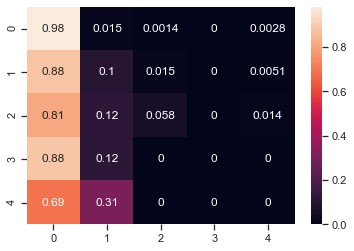

array([1, 1, 1, ..., 1, 2, 1], dtype=int64)

In [166]:
predict_and_plot(inputs, targets, "P")

In [168]:
new_input= {
             "famrel": 1, "age": 20, "freetime": 1, "health":1, "absences":20, "gender":1, "fam_size":1, "goout": 4, "romance": 1,
    "G1": 10, "G2":5, "G3":8
}

In [169]:
new_input_df= pd.DataFrame([new_input])

In [170]:
new_input_df

,famrel,age,freetime,health,absences,gender,fam_size,goout,romance,G1,G2,G3
0,1,20,1,1,20,1,1,4,1,10,5,8


In [171]:
prediction= model.predict(new_input_df)[0]

In [172]:
prediction

4